Part1. 데이터 분석 EDA

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# 0. 파일 불러오기
data = pd.read_csv('train.csv')

In [4]:
# 1. 결측치 확인하기
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

c:\Users\82109\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


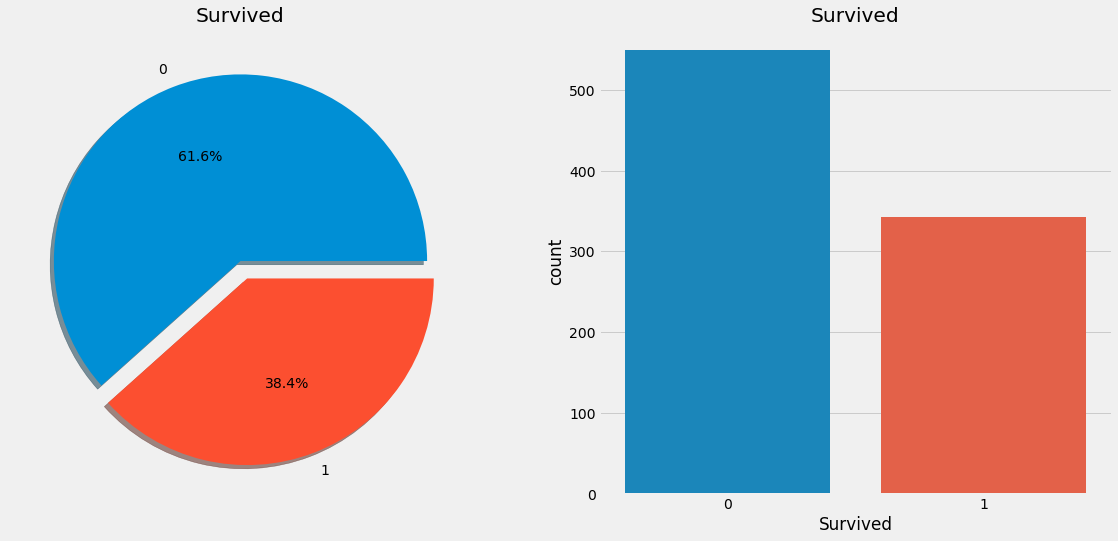

In [18]:
# 2. 생존자 비율 확인하기
f,ax= plt.subplots(1,2, figsize= (18,8))
data['Survived'].value_counts().plot.pie(explode= [0, 0.1], autopct= '%1.1f%%', ax= ax[0], shadow= True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data= data, ax= ax[1])
ax[1].set_title('Survived')
plt.show()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


c:\Users\82109\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


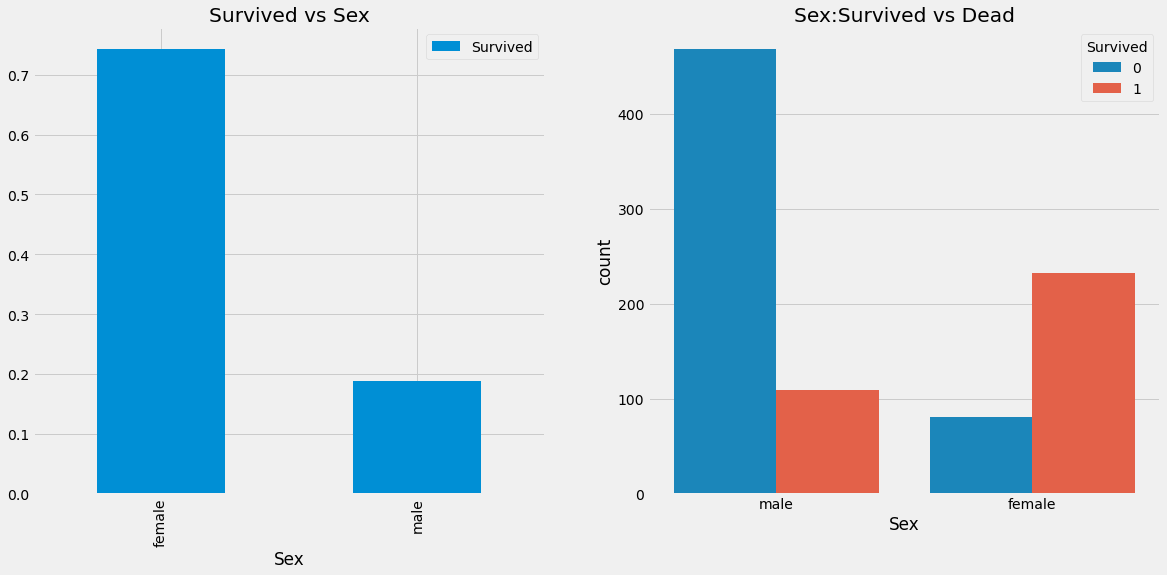

In [32]:
# 3. Sex 특성 분석
# 카테고리 특성: Categorical Features (예: 성별)
print(data.groupby(['Sex', 'Survived'])['Survived'].count())

f, ax= plt.subplots(1,2, figsize= (18, 8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax= ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue= 'Survived', data= data, ax= ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

# 배에 타고 있는 남자의 수가 훨신 많지만 살아남은 비율은 낮다.

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


c:\Users\82109\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


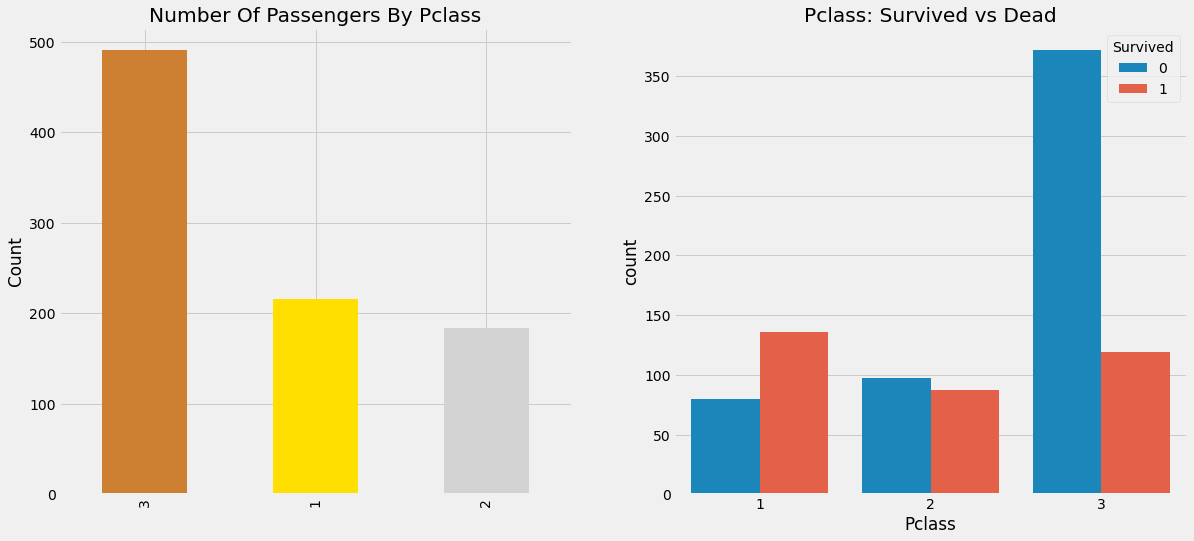

c:\Users\82109\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\82109\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


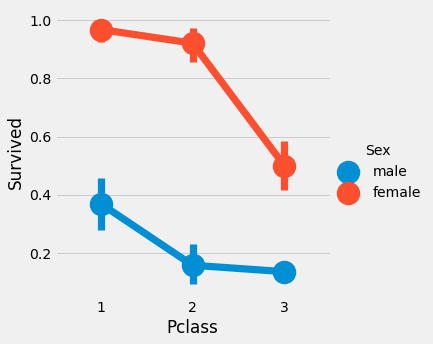

In [43]:
# 4. Pclass 특성 분석
# Ordinal Features : 서수 (ex. Tall, Medium, short)
# 1) 각 등급별 생존자
display(pd.crosstab(data.Pclass, data.Survived, margins= True).style.background_gradient(cmap= 'summer_r'))

f,ax= plt.subplots(1,2, figsize= (18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax= ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue= 'Survived', data= data, ax= ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()
# 1등급 좌석에 탄 사람이 사망한 사람보다 생존한 사람이 더 많다.

# 2) 각 등급별, 성별 생존자
display(pd.crosstab([data.Sex, data.Survived], data.Pclass, margins= True).style.background_gradient(cmap= 'summer_r'))

sns.factorplot('Pclass', 'Survived', hue= 'Sex', data= data)
plt.show()
# 전체적으로 여성이 많이 살아남았고 등급이 낮아질수록 생존율이 떨어짐

가장 많은 나이: 80.0 살
가장 적은 나이: 0.42 살
평균 나이: 29.69911764705882 살


c:\Users\82109\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\82109\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


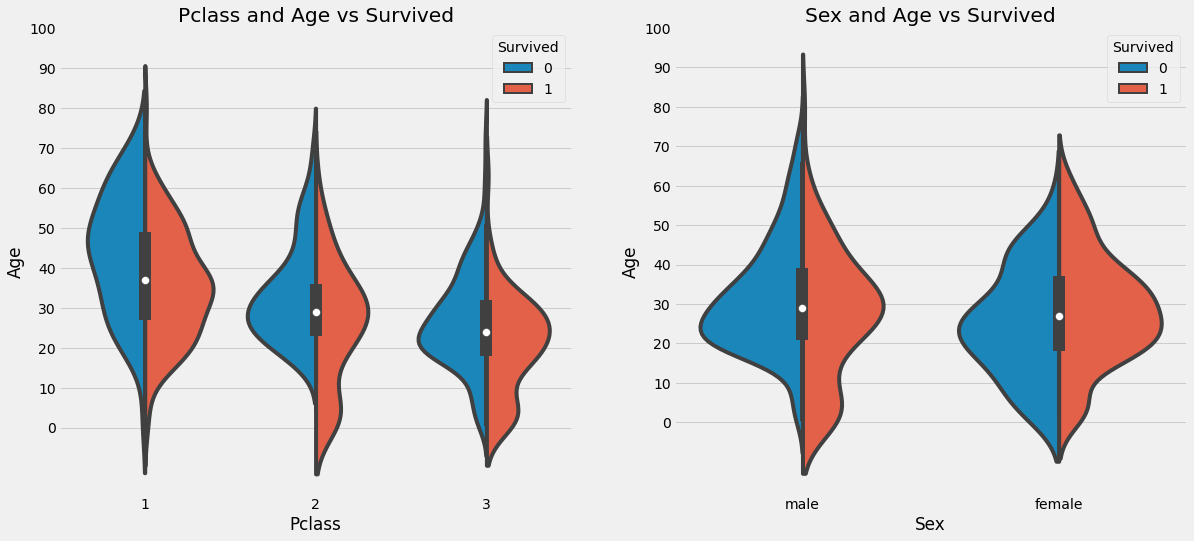

In [50]:
# Age 특성 분석
# Continous Features: 연속성 특성 (ex. 나이)
print('가장 많은 나이:', data['Age'].max(), '살')
print('가장 적은 나이:', data['Age'].min(), '살')
print('평균 나이:', data['Age'].mean(), '살')

f,ax= plt.subplots(1,2, figsize= (18,8))
sns.violinplot('Pclass','Age', hue= 'Survived', data= data, split= True, ax= ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue= 'Survived', data= data, split= True, ax= ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [ ]:
# 오늘은 여기까지
# https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook